# Language Translator ML Project
## Multi-language translation system supporting 10 languages

**Languages Supported:**
- English (en_US)
- German (de_DE)
- Hindi (hi_IN)
- Spanish (es_ES)
- French (fr_FR)
- Italian (it_IT)
- Arabic (ar_SA)
- Dutch (nl_NL)
- Japanese (ja_JP)
- Portuguese (pt_PT)

## Step 1: Import Libraries and Load Dataset

In [1]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle
import os
from collections import Counter
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('ggplot')
sns.set_palette("husl")
print("✓ Libraries imported successfully")

✓ Libraries imported successfully


In [2]:
from datasets import load_dataset

ds = load_dataset("Amani27/massive_translation_dataset")
ds

DatasetDict({
    train: Dataset({
        features: ['id', 'split', 'en_US', 'de_DE', 'hi_IN', 'es_ES', 'fr_FR', 'it_IT', 'ar_SA', 'nl_NL', 'ja_JP', 'pt_PT'],
        num_rows: 11514
    })
    validation: Dataset({
        features: ['id', 'split', 'en_US', 'de_DE', 'hi_IN', 'es_ES', 'fr_FR', 'it_IT', 'ar_SA', 'nl_NL', 'ja_JP', 'pt_PT'],
        num_rows: 2033
    })
    test: Dataset({
        features: ['id', 'split', 'en_US', 'de_DE', 'hi_IN', 'es_ES', 'fr_FR', 'it_IT', 'ar_SA', 'nl_NL', 'ja_JP', 'pt_PT'],
        num_rows: 2974
    })
})

## Step 2: Exploratory Data Analysis (EDA)

In [3]:
# Convert dataset to pandas DataFrame for easier analysis
train_df = pd.DataFrame(ds['train'])
val_df = pd.DataFrame(ds['validation'])
test_df = pd.DataFrame(ds['test'])

print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)
print(f"Training samples: {len(train_df)}")
print(f"Validation samples: {len(val_df)}")
print(f"Test samples: {len(test_df)}")
print(f"Total samples: {len(train_df) + len(val_df) + len(test_df)}")
print(f"\nColumns: {list(train_df.columns)}")
print(f"\nShape: {train_df.shape}")
print("\n" + "=" * 60)
print("FIRST 5 SAMPLES")
print("=" * 60)
train_df.head()

DATASET OVERVIEW
Training samples: 11514
Validation samples: 2033
Test samples: 2974
Total samples: 16521

Columns: ['id', 'split', 'en_US', 'de_DE', 'hi_IN', 'es_ES', 'fr_FR', 'it_IT', 'ar_SA', 'nl_NL', 'ja_JP', 'pt_PT']

Shape: (11514, 12)

FIRST 5 SAMPLES


,id,split,en_US,de_DE,hi_IN,es_ES,fr_FR,it_IT,ar_SA,nl_NL,ja_JP,pt_PT
0,1,train,wake me up at nine am on friday,weck mich am freitag um neun uhr auf,शुक्रवार को सुबह नौ बजे मुझे जगा दो,despiértame a las nueve de la mañana el viernes,réveille-moi à neuf heures du matin le vendredi,svegliami alle nove di mattina venerdì,صحيني تسعة الصباح يوم الجمعة,maakt mijn wakker om negen uur in de ochtend o...,金曜日の午前九時に起こしてください,acorda-me às nove da manhã na sexta-feira
1,2,train,set an alarm for two hours from now,stell einen wecker für zwei stunden ab jetzt,अभी से दो घंटे के लिए अलार्म लगाओ,pon una alarma en dos horas desde ahora,régler une alarme pour deux heures à partir dè...,imposta una sveglia tra due ore,حط منبه بعد ساعتين من الحين,zet een alarm voor twee uur vanaf nu,今から二時間後にアラームをセットする,accionar um alarme durante duas horas a partir...
2,4,train,olly quiet,olly leise,olly चुप रहो,olly silencio,olly silence,olly zitto,olly هدوء,stil ollie,静かに,olly não fales
3,5,train,stop,stopp,रुको,parar,stop,ferma,وقف,stoppen,止めて,pára
4,6,train,olly pause for ten seconds,olly pausiere für zehn sekunden,olly दस सेकंड के लिए रुको,olly para por un minuto,olly mets en pause pour dix secondes,olly metti in pausa per dieci secondi,أوللي وقف مؤقتاً لمدة عشر ثواني,olly pauzeer voor tien seconden,十秒間ポーズして,olly pára durante dez segundos


In [4]:
# Check for missing values
print("=" * 60)
print("MISSING VALUES CHECK")
print("=" * 60)
missing_data = train_df.isnull().sum()
print(missing_data)
print(f"\nTotal missing values: {missing_data.sum()}")

# Check data types
print("\n" + "=" * 60)
print("DATA TYPES")
print("=" * 60)
print(train_df.dtypes)

# Basic statistics
print("\n" + "=" * 60)
print("BASIC INFORMATION")
print("=" * 60)
train_df.info()

MISSING VALUES CHECK
id       0
split    0
en_US    0
de_DE    0
hi_IN    0
es_ES    0
fr_FR    0
it_IT    0
ar_SA    0
nl_NL    0
ja_JP    0
pt_PT    0
dtype: int64

Total missing values: 0

DATA TYPES
id       int64
split      str
en_US      str
de_DE      str
hi_IN      str
es_ES      str
fr_FR      str
it_IT      str
ar_SA      str
nl_NL      str
ja_JP      str
pt_PT      str
dtype: object

BASIC INFORMATION
<class 'pandas.DataFrame'>
RangeIndex: 11514 entries, 0 to 11513
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      11514 non-null  int64
 1   split   11514 non-null  str  
 2   en_US   11514 non-null  str  
 3   de_DE   11514 non-null  str  
 4   hi_IN   11514 non-null  str  
 5   es_ES   11514 non-null  str  
 6   fr_FR   11514 non-null  str  
 7   it_IT   11514 non-null  str  
 8   ar_SA   11514 non-null  str  
 9   nl_NL   11514 non-null  str  
 10  ja_JP   11514 non-null  str  
 11  pt_PT   11514 non-null  st

In [5]:
# Analyze text lengths across languages
languages = ['en_US', 'de_DE', 'hi_IN', 'es_ES', 'fr_FR', 'it_IT', 'ar_SA', 'nl_NL', 'ja_JP', 'pt_PT']

print("=" * 60)
print("TEXT LENGTH STATISTICS (in characters)")
print("=" * 60)

length_stats = {}
for lang in languages:
    lengths = train_df[lang].str.len()
    length_stats[lang] = {
        'mean': lengths.mean(),
        'median': lengths.median(),
        'min': lengths.min(),
        'max': lengths.max(),
        'std': lengths.std()
    }
    
length_df = pd.DataFrame(length_stats).T
print(length_df.round(2))

TEXT LENGTH STATISTICS (in characters)
        mean  median  min    max    std
en_US  35.04    32.0  2.0  189.0  16.60
de_DE  39.59    37.0  2.0  200.0  18.53
hi_IN  35.85    33.0  2.0  178.0  17.30
es_ES  39.62    36.0  2.0  205.0  19.39
fr_FR  42.78    40.0  2.0  221.0  19.88
it_IT  38.57    36.0  2.0  176.0  18.14
ar_SA  26.97    25.0  2.0  152.0  14.22
nl_NL  39.86    37.0  2.0  199.0  19.14
ja_JP  15.62    14.0  1.0   75.0   7.44
pt_PT  38.53    36.0  3.0  199.0  18.65


## Step 3: Data Visualization

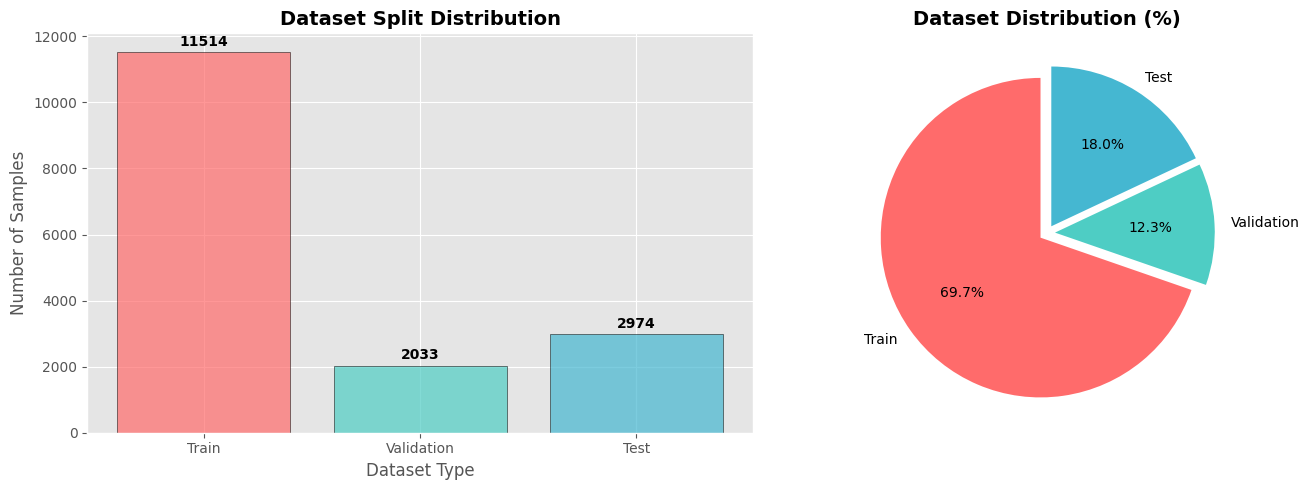

✓ Total dataset size: 16521 samples


In [6]:
# Visualize dataset split distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Dataset split sizes
splits = ['Train', 'Validation', 'Test']
sizes = [len(train_df), len(val_df), len(test_df)]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

axes[0].bar(splits, sizes, color=colors, alpha=0.7, edgecolor='black')
axes[0].set_title('Dataset Split Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Number of Samples', fontsize=12)
axes[0].set_xlabel('Dataset Type', fontsize=12)
for i, v in enumerate(sizes):
    axes[0].text(i, v + 200, str(v), ha='center', fontweight='bold')

# Pie chart
axes[1].pie(sizes, labels=splits, autopct='%1.1f%%', colors=colors, 
            startangle=90, explode=(0.05, 0.05, 0.05))
axes[1].set_title('Dataset Distribution (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"✓ Total dataset size: {sum(sizes)} samples")

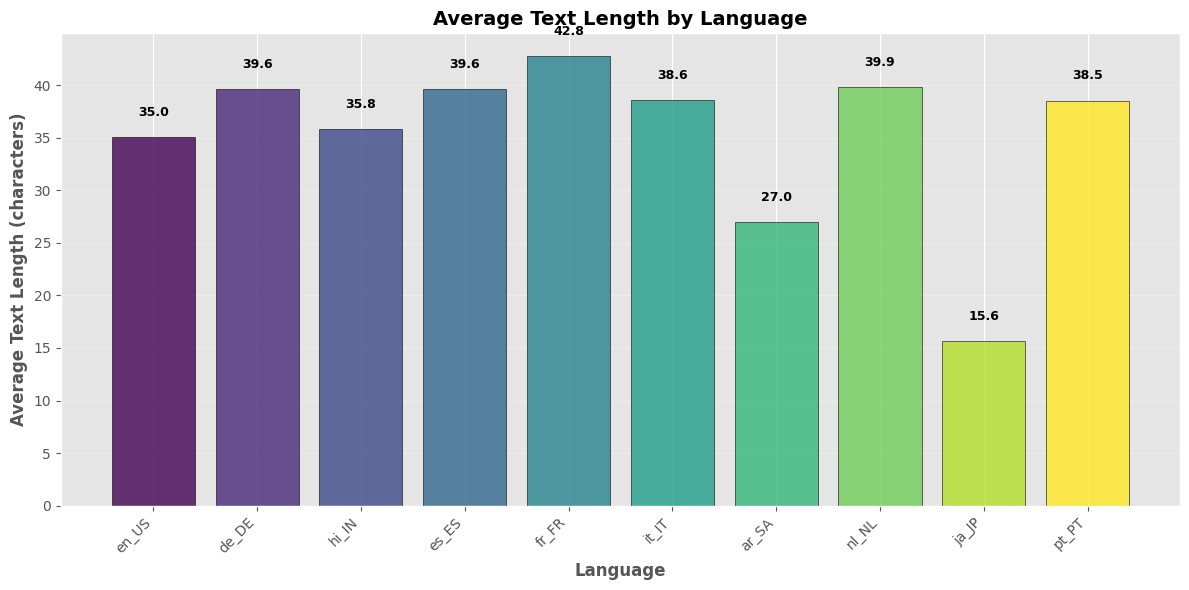


✓ Visualization complete


In [7]:
# Visualize average text length by language
avg_lengths = {lang: train_df[lang].str.len().mean() for lang in languages}

plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(languages)), list(avg_lengths.values()), 
               color=plt.cm.viridis(np.linspace(0, 1, len(languages))),
               edgecolor='black', alpha=0.8)

plt.xlabel('Language', fontsize=12, fontweight='bold')
plt.ylabel('Average Text Length (characters)', fontsize=12, fontweight='bold')
plt.title('Average Text Length by Language', fontsize=14, fontweight='bold')
plt.xticks(range(len(languages)), languages, rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (lang, val) in enumerate(avg_lengths.items()):
    plt.text(i, val + 2, f'{val:.1f}', ha='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

print("\n✓ Visualization complete")

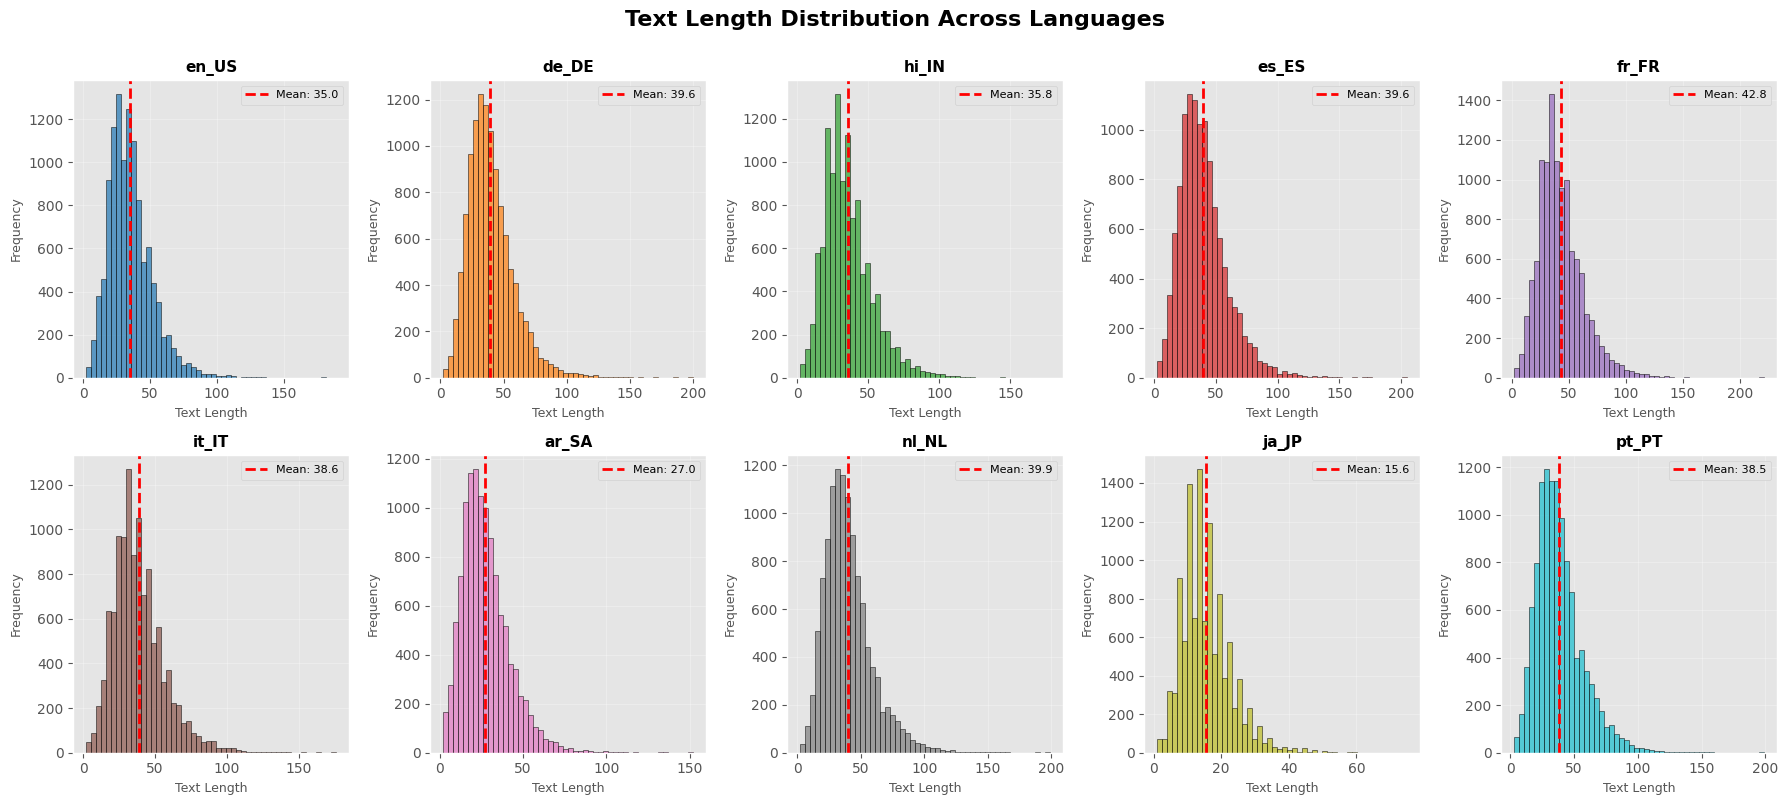

✓ Distribution analysis complete


In [8]:
# Distribution of text lengths (histogram)
fig, axes = plt.subplots(2, 5, figsize=(18, 8))
axes = axes.flatten()

for idx, lang in enumerate(languages):
    lengths = train_df[lang].str.len()
    axes[idx].hist(lengths, bins=50, color=plt.cm.tab10(idx), alpha=0.7, edgecolor='black')
    axes[idx].set_title(f'{lang}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Text Length', fontsize=9)
    axes[idx].set_ylabel('Frequency', fontsize=9)
    axes[idx].axvline(lengths.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {lengths.mean():.1f}')
    axes[idx].legend(fontsize=8)
    axes[idx].grid(alpha=0.3)

plt.suptitle('Text Length Distribution Across Languages', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("✓ Distribution analysis complete")

## Step 4: Feature Engineering & Text Preprocessing

In [9]:
# Import PyTorch and preprocessing libraries
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
from collections import Counter
import re
import unicodedata

print("✓ PyTorch and preprocessing libraries imported")

# Define special tokens
PAD_TOKEN = '<PAD>'
UNK_TOKEN = '<UNK>'
SOS_TOKEN = '<SOS>'  # Start of sequence
EOS_TOKEN = '<EOS>'  # End of sequence

print(f"✓ Special tokens defined: {PAD_TOKEN}, {UNK_TOKEN}, {SOS_TOKEN}, {EOS_TOKEN}")

✓ PyTorch and preprocessing libraries imported
✓ Special tokens defined: <PAD>, <UNK>, <SOS>, <EOS>


In [10]:
# Text preprocessing functions
def normalize_text(text):
    """Normalize text by removing accents and converting to lowercase"""
    text = text.lower().strip()
    # Normalize unicode characters
    text = unicodedata.normalize('NFD', text)
    text = ''.join(char for char in text if unicodedata.category(char) != 'Mn')
    # Add spaces around punctuation
    text = re.sub(r"([.!?])", r" \1", text)
    text = re.sub(r"[^a-zA-Z.!?]+", r" ", text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def tokenize(text):
    """Simple word tokenization"""
    return text.split()

# Test preprocessing
sample_text = train_df['en_US'].iloc[0]
print(f"Original: {sample_text}")
print(f"Normalized: {normalize_text(sample_text)}")
print(f"Tokenized: {tokenize(normalize_text(sample_text))}")
print("\n✓ Preprocessing functions defined")

Original: wake me up at nine am on friday
Normalized: wake me up at nine am on friday
Tokenized: ['wake', 'me', 'up', 'at', 'nine', 'am', 'on', 'friday']

✓ Preprocessing functions defined


In [11]:
# Build vocabulary class
class Vocabulary:
    def __init__(self, freq_threshold=2):
        self.itos = {0: PAD_TOKEN, 1: SOS_TOKEN, 2: EOS_TOKEN, 3: UNK_TOKEN}
        self.stoi = {PAD_TOKEN: 0, SOS_TOKEN: 1, EOS_TOKEN: 2, UNK_TOKEN: 3}
        self.freq_threshold = freq_threshold
        
    def __len__(self):
        return len(self.itos)
    
    def build_vocabulary(self, sentence_list):
        frequencies = Counter()
        idx = 4
        
        for sentence in sentence_list:
            for word in tokenize(sentence):
                frequencies[word] += 1
                
                if frequencies[word] == self.freq_threshold:
                    self.stoi[word] = idx
                    self.itos[idx] = word
                    idx += 1
    
    def numericalize(self, text):
        tokenized_text = tokenize(text)
        return [self.stoi.get(token, self.stoi[UNK_TOKEN]) for token in tokenized_text]

print("✓ Vocabulary class defined")

✓ Vocabulary class defined


## Step 5: Build Vocabularies for All Languages

In [12]:
# Build vocabularies for all languages
print("Building vocabularies for all languages...")
print("=" * 60)

vocabularies = {}
for lang in languages:
    print(f"Building vocabulary for {lang}...", end=" ")
    vocab = Vocabulary(freq_threshold=2)
    
    # Normalize all texts first
    normalized_texts = [normalize_text(str(text)) for text in train_df[lang]]
    vocab.build_vocabulary(normalized_texts)
    
    vocabularies[lang] = vocab
    print(f"✓ Size: {len(vocab)} tokens")

print("=" * 60)
print(f"✓ All vocabularies built successfully!")
print(f"Total vocabularies: {len(vocabularies)}")

Building vocabularies for all languages...
Building vocabulary for en_US... ✓ Size: 2725 tokens
Building vocabulary for de_DE... ✓ Size: 3220 tokens
Building vocabulary for hi_IN... ✓ Size: 217 tokens
Building vocabulary for es_ES... ✓ Size: 3069 tokens
Building vocabulary for fr_FR... ✓ Size: 3032 tokens
Building vocabulary for it_IT... ✓ Size: 2938 tokens
Building vocabulary for ar_SA... ✓ Size: 253 tokens
Building vocabulary for nl_NL... ✓ Size: 2983 tokens
Building vocabulary for ja_JP... ✓ Size: 143 tokens
Building vocabulary for pt_PT... ✓ Size: 3008 tokens
✓ All vocabularies built successfully!
Total vocabularies: 10


## Step 6: Create Dataset and DataLoader

In [13]:
# Custom Dataset class for translation
class TranslationDataset(Dataset):
    def __init__(self, dataframe, src_lang, tgt_lang, src_vocab, tgt_vocab, max_len=50):
        self.dataframe = dataframe
        self.src_lang = src_lang
        self.tgt_lang = tgt_lang
        self.src_vocab = src_vocab
        self.tgt_vocab = tgt_vocab
        self.max_len = max_len
        
    def __len__(self):
        return len(self.dataframe)
    
    def __getitem__(self, idx):
        src_text = normalize_text(str(self.dataframe.iloc[idx][self.src_lang]))
        tgt_text = normalize_text(str(self.dataframe.iloc[idx][self.tgt_lang]))
        
        src_numericalized = [self.src_vocab.stoi[SOS_TOKEN]]
        src_numericalized += self.src_vocab.numericalize(src_text)
        src_numericalized.append(self.src_vocab.stoi[EOS_TOKEN])
        
        tgt_numericalized = [self.tgt_vocab.stoi[SOS_TOKEN]]
        tgt_numericalized += self.tgt_vocab.numericalize(tgt_text)
        tgt_numericalized.append(self.tgt_vocab.stoi[EOS_TOKEN])
        
        return torch.tensor(src_numericalized), torch.tensor(tgt_numericalized)

print("✓ TranslationDataset class defined")

✓ TranslationDataset class defined


## Step 7: Build Seq2Seq Model (Encoder-Decoder with LSTM)

In [14]:
# Encoder with LSTM
class Encoder(nn.Module):
    def __init__(self, input_size, embedding_size, hidden_size, num_layers, dropout):
        super(Encoder, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        self.embedding = nn.Embedding(input_size, embedding_size)
        self.lstm = nn.LSTM(embedding_size, hidden_size, num_layers, dropout=dropout, batch_first=True)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x):
        # x shape: (batch_size, seq_length)
        embedding = self.dropout(self.embedding(x))
        # embedding shape: (batch_size, seq_length, embedding_size)
        
        outputs, (hidden, cell) = self.lstm(embedding)
        # outputs shape: (batch_size, seq_length, hidden_size)
        # hidden shape: (num_layers, batch_size, hidden_size)
        
        return outputs, hidden, cell

print("✓ Encoder defined")

✓ Encoder defined


In [15]:
# Decoder with LSTM
class Decoder(nn.Module):
    def __init__(self, input_size, embedding_size, hidden_size, output_size, num_layers, dropout):
        super(Decoder, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        self.embedding = nn.Embedding(input_size, embedding_size)
        self.lstm = nn.LSTM(embedding_size, hidden_size, num_layers, dropout=dropout, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x, hidden, cell):
        # x shape: (batch_size, 1)
        x = x.unsqueeze(1) if x.dim() == 1 else x
        
        embedding = self.dropout(self.embedding(x))
        # embedding shape: (batch_size, 1, embedding_size)
        
        outputs, (hidden, cell) = self.lstm(embedding, (hidden, cell))
        # outputs shape: (batch_size, 1, hidden_size)
        
        predictions = self.fc(outputs)
        # predictions shape: (batch_size, 1, output_size)
        
        predictions = predictions.squeeze(1)
        
        return predictions, hidden, cell

print("✓ Decoder defined")

✓ Decoder defined


In [16]:
# Seq2Seq Model
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, device):
        super(Seq2Seq, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.device = device
        
    def forward(self, source, target, teacher_force_ratio=0.5):
        batch_size = source.shape[0]
        target_len = target.shape[1]
        target_vocab_size = self.decoder.fc.out_features
        
        outputs = torch.zeros(batch_size, target_len, target_vocab_size).to(self.device)
        
        encoder_outputs, hidden, cell = self.encoder(source)
        
        # First input to decoder is SOS token
        x = target[:, 0]
        
        for t in range(1, target_len):
            output, hidden, cell = self.decoder(x, hidden, cell)
            outputs[:, t, :] = output
            
            # Teacher forcing
            teacher_force = torch.rand(1).item() < teacher_force_ratio
            top1 = output.argmax(1)
            x = target[:, t] if teacher_force else top1
            
        return outputs

print("✓ Seq2Seq model defined")

✓ Seq2Seq model defined


## Step 8: Training Setup and Model Training

In [17]:
# Hyperparameters
EMBEDDING_SIZE = 256
HIDDEN_SIZE = 512
NUM_LAYERS = 2
DROPOUT = 0.5
LEARNING_RATE = 0.001
BATCH_SIZE = 32
NUM_EPOCHS = 10

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"✓ Using device: {device}")
print(f"✓ Hyperparameters set:")
print(f"  - Embedding size: {EMBEDDING_SIZE}")
print(f"  - Hidden size: {HIDDEN_SIZE}")
print(f"  - Num layers: {NUM_LAYERS}")
print(f"  - Dropout: {DROPOUT}")
print(f"  - Learning rate: {LEARNING_RATE}")
print(f"  - Batch size: {BATCH_SIZE}")
print(f"  - Epochs: {NUM_EPOCHS}")

✓ Using device: cpu
✓ Hyperparameters set:
  - Embedding size: 256
  - Hidden size: 512
  - Num layers: 2
  - Dropout: 0.5
  - Learning rate: 0.001
  - Batch size: 32
  - Epochs: 10


In [18]:
# Helper function for collate (padding sequences)
def collate_fn(batch):
    src_batch, tgt_batch = [], []
    
    for src, tgt in batch:
        src_batch.append(src)
        tgt_batch.append(tgt)
    
    src_batch = nn.utils.rnn.pad_sequence(src_batch, batch_first=True, padding_value=0)
    tgt_batch = nn.utils.rnn.pad_sequence(tgt_batch, batch_first=True, padding_value=0)
    
    return src_batch, tgt_batch

print("✓ Collate function defined")

✓ Collate function defined


In [19]:
# Initialize model for English to Spanish (example)
# You can train multiple models for different language pairs

SRC_LANG = 'en_US'
TGT_LANG = 'es_ES'

print(f"Training model for: {SRC_LANG} → {TGT_LANG}")
print("=" * 60)

# Get vocabularies
src_vocab = vocabularies[SRC_LANG]
tgt_vocab = vocabularies[TGT_LANG]

print(f"Source vocab size: {len(src_vocab)}")
print(f"Target vocab size: {len(tgt_vocab)}")

# Create dataset
train_dataset = TranslationDataset(train_df, SRC_LANG, TGT_LANG, src_vocab, tgt_vocab)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)

print(f"Number of training batches: {len(train_loader)}")
print(f"✓ Dataset and DataLoader created")

Training model for: en_US → es_ES
Source vocab size: 2725
Target vocab size: 3069
Number of training batches: 360
✓ Dataset and DataLoader created


In [20]:
# Initialize model
encoder = Encoder(len(src_vocab), EMBEDDING_SIZE, HIDDEN_SIZE, NUM_LAYERS, DROPOUT).to(device)
decoder = Decoder(len(tgt_vocab), EMBEDDING_SIZE, HIDDEN_SIZE, len(tgt_vocab), NUM_LAYERS, DROPOUT).to(device)
model = Seq2Seq(encoder, decoder, device).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss(ignore_index=0)  # Ignore padding
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

print("✓ Model initialized")
print(f"✓ Total parameters: {sum(p.numel() for p in model.parameters()):,}")
print(f"✓ Trainable parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad):,}")

✓ Model initialized
✓ Total parameters: 10,414,077
✓ Trainable parameters: 10,414,077


In [21]:
# Training loop
print("\n" + "=" * 60)
print("STARTING TRAINING")
print("=" * 60)

train_losses = []

for epoch in range(NUM_EPOCHS):
    model.train()
    epoch_loss = 0
    
    for batch_idx, (src, tgt) in enumerate(train_loader):
        src = src.to(device)
        tgt = tgt.to(device)
        
        optimizer.zero_grad()
        
        output = model(src, tgt)
        
        # Reshape for loss calculation
        output_dim = output.shape[-1]
        output = output[:, 1:].reshape(-1, output_dim)
        tgt = tgt[:, 1:].reshape(-1)
        
        loss = criterion(output, tgt)
        loss.backward()
        
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
        
        optimizer.step()
        
        epoch_loss += loss.item()
        
        if (batch_idx + 1) % 50 == 0:
            print(f'Epoch [{epoch+1}/{NUM_EPOCHS}], Batch [{batch_idx+1}/{len(train_loader)}], Loss: {loss.item():.4f}')
    
    avg_loss = epoch_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f'\n{"="*60}')
    print(f'Epoch [{epoch+1}/{NUM_EPOCHS}] - Average Loss: {avg_loss:.4f}')
    print(f'{"="*60}\n')

print("✓ Training completed!")


STARTING TRAINING
Epoch [1/10], Batch [50/360], Loss: 5.3981
Epoch [1/10], Batch [100/360], Loss: 5.3383
Epoch [1/10], Batch [150/360], Loss: 5.1197
Epoch [1/10], Batch [200/360], Loss: 5.3732
Epoch [1/10], Batch [250/360], Loss: 5.4134
Epoch [1/10], Batch [300/360], Loss: 4.7731
Epoch [1/10], Batch [350/360], Loss: 4.7555

Epoch [1/10] - Average Loss: 5.1863

Epoch [2/10], Batch [50/360], Loss: 4.5509
Epoch [2/10], Batch [100/360], Loss: 4.8446
Epoch [2/10], Batch [150/360], Loss: 4.4564
Epoch [2/10], Batch [200/360], Loss: 4.7018
Epoch [2/10], Batch [250/360], Loss: 4.7763
Epoch [2/10], Batch [300/360], Loss: 4.5217
Epoch [2/10], Batch [350/360], Loss: 4.2723

Epoch [2/10] - Average Loss: 4.5927

Epoch [3/10], Batch [50/360], Loss: 4.3462
Epoch [3/10], Batch [100/360], Loss: 4.1304
Epoch [3/10], Batch [150/360], Loss: 4.0066
Epoch [3/10], Batch [200/360], Loss: 4.1475
Epoch [3/10], Batch [250/360], Loss: 3.8594
Epoch [3/10], Batch [300/360], Loss: 4.0086
Epoch [3/10], Batch [350/360

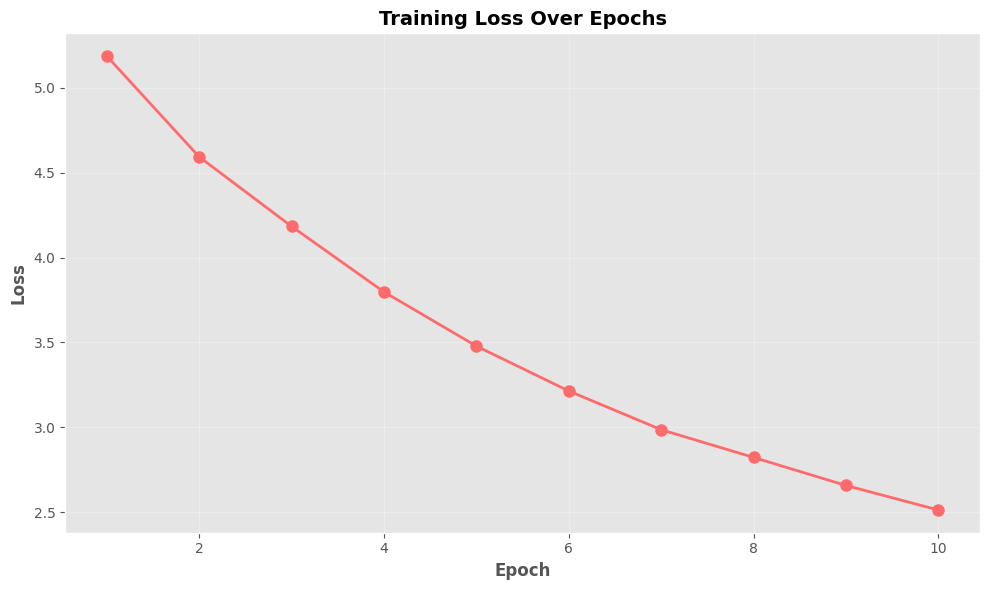

✓ Training visualization complete


In [22]:
# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, NUM_EPOCHS + 1), train_losses, marker='o', linewidth=2, markersize=8, color='#FF6B6B')
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Loss', fontsize=12, fontweight='bold')
plt.title('Training Loss Over Epochs', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("✓ Training visualization complete")

## Step 9: Save Model (Pickle Format)

In [23]:
# Create models directory
os.makedirs('models', exist_ok=True)

# Save model and vocabularies
model_save_path = f'models/translator_{SRC_LANG}_to_{TGT_LANG}.pkl'

model_data = {
    'model_state_dict': model.state_dict(),
    'src_vocab': src_vocab,
    'tgt_vocab': tgt_vocab,
    'src_lang': SRC_LANG,
    'tgt_lang': TGT_LANG,
    'hyperparameters': {
        'embedding_size': EMBEDDING_SIZE,
        'hidden_size': HIDDEN_SIZE,
        'num_layers': NUM_LAYERS,
        'dropout': DROPOUT
    },
    'train_losses': train_losses
}

with open(model_save_path, 'wb') as f:
    pickle.dump(model_data, f)

print(f"✓ Model saved successfully to: {model_save_path}")
print(f"✓ File size: {os.path.getsize(model_save_path) / 1024 / 1024:.2f} MB")

✓ Model saved successfully to: models/translator_en_US_to_es_ES.pkl
✓ File size: 39.84 MB


## Step 10: Model Testing & Translation Function

In [24]:
# Translation function
def translate_sentence(model, sentence, src_vocab, tgt_vocab, device, max_length=50):
    model.eval()
    
    # Preprocess
    sentence = normalize_text(sentence)
    tokens = [src_vocab.stoi[SOS_TOKEN]] + src_vocab.numericalize(sentence) + [src_vocab.stoi[EOS_TOKEN]]
    
    src_tensor = torch.LongTensor(tokens).unsqueeze(0).to(device)
    
    with torch.no_grad():
        encoder_outputs, hidden, cell = model.encoder(src_tensor)
    
    outputs = [tgt_vocab.stoi[SOS_TOKEN]]
    
    for _ in range(max_length):
        previous_word = torch.LongTensor([outputs[-1]]).to(device)
        
        with torch.no_grad():
            output, hidden, cell = model.decoder(previous_word, hidden, cell)
            best_guess = output.argmax(1).item()
        
        outputs.append(best_guess)
        
        if best_guess == tgt_vocab.stoi[EOS_TOKEN]:
            break
    
    translated_tokens = [tgt_vocab.itos[idx] for idx in outputs]
    
    # Remove SOS and EOS tokens
    return ' '.join(translated_tokens[1:-1])

print("✓ Translation function defined")

✓ Translation function defined


In [25]:
# Test the model with sample translations
print("=" * 60)
print("TESTING TRANSLATIONS")
print("=" * 60)

test_sentences = [
    "Hello, how are you?",
    "I love programming.",
    "The weather is beautiful today.",
    "What time is it?",
    "Thank you very much."
]

for idx, sentence in enumerate(test_sentences, 1):
    translation = translate_sentence(model, sentence, src_vocab, tgt_vocab, device)
    
    print(f"\n{idx}. Source ({SRC_LANG}): {sentence}")
    print(f"   Predicted ({TGT_LANG}): {translation}")
    print("-" * 60)

print("\n✓ Testing complete!")

TESTING TRANSLATIONS

1. Source (en_US): Hello, how are you?
   Predicted (es_ES): como como estas
------------------------------------------------------------

2. Source (en_US): I love programming.
   Predicted (es_ES): <UNK> <UNK>
------------------------------------------------------------

3. Source (en_US): The weather is beautiful today.
   Predicted (es_ES): el tiempo de hoy es hoy
------------------------------------------------------------

4. Source (en_US): What time is it?
   Predicted (es_ES): que hora es en madrid
------------------------------------------------------------

5. Source (en_US): Thank you very much.
   Predicted (es_ES): <UNK> <UNK>
------------------------------------------------------------

✓ Testing complete!
